#Importing all required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Loading the Data

In [0]:
data = pd.read_csv("/content/drive/My Drive/bankcap2.csv")

# View the first 5 rows in the dataset

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
data.count()

age          4521
job          4521
marital      4521
education    4521
default      4521
balance      4521
housing      4521
loan         4521
contact      4521
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
previous     4521
poutcome     4521
y            4521
dtype: int64

#Data Preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


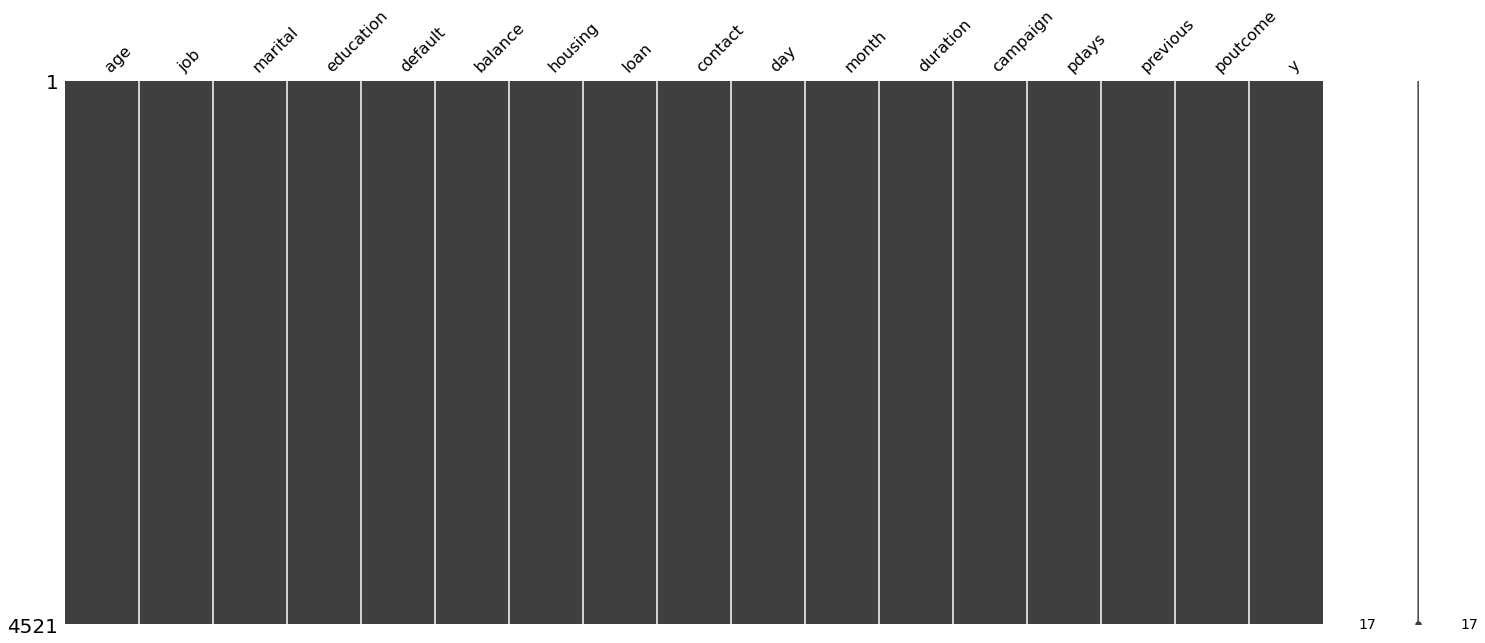

In [10]:
import missingno as msno
msno.matrix(data)

#NO MISSING VALUES IN THE DATA




Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

Delete the rows which column 'poutcome' contains 'other'

In [0]:
condition = data.poutcome == 'other'
data2 = data.drop(data[condition].index, axis = 0, inplace = False)

In [12]:
print(data2['poutcome'])

0       unknown
1       failure
2       failure
3       unknown
4       unknown
         ...   
4514    failure
4515    unknown
4516    unknown
4517    unknown
4518    unknown
Name: poutcome, Length: 4324, dtype: object


In [13]:
data2.count()

age          4324
job          4324
marital      4324
education    4324
default      4324
balance      4324
housing      4324
loan         4324
contact      4324
day          4324
month        4324
duration     4324
campaign     4324
pdays        4324
previous     4324
poutcome     4324
y            4324
dtype: int64

In [14]:
data2['job'].value_counts()


management       920
blue-collar      909
technician       738
admin.           452
services         401
retired          225
self-employed    174
entrepreneur     161
unemployed       123
housemaid        108
student           76
unknown           37
Name: job, dtype: int64

In [15]:
data2['education'].value_counts()

secondary    2204
tertiary     1285
primary       656
unknown       179
Name: education, dtype: int64

Replace 'unknown' in job and education with 'other'

In [0]:
data2[['job','education']] = data2[['job','education']].replace(['unknown'],'other')


# Drop outliers in the column 'balance

In order to capture the general trend in the dataset, outliers in the column “balance” are dropped. Outliers are defined as the values which are more than three standard deviations away from the mean.

In [0]:
from scipy.stats import zscore

data2[['balance']].mean()
data2[['balance']].mean()

data2['balance_outliers'] = data2['balance']
data2['balance_outliers']= zscore(data2['balance_outliers'])

condition1 = (data2['balance_outliers']>3) | (data2['balance_outliers']<-3 )
data3 = data2.drop(data2[condition1].index, axis = 0, inplace = False)

In [0]:
data4 = data3.drop('balance_outliers', axis=1)

In [19]:
data4.count()

age          4239
job          4239
marital      4239
education    4239
default      4239
balance      4239
housing      4239
loan         4239
contact      4239
day          4239
month        4239
duration     4239
campaign     4239
pdays        4239
previous     4239
poutcome     4239
y            4239
dtype: int64

#Creating and transforming data


Some changes were made to the column name, units and data types for easier analysis.

In [0]:
#Step 1: Change column name: 'y' to 'response'
data4.rename(index=str, columns={'y': 'response'}, inplace = True)

In [21]:
data4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


In [22]:
#converting response to binary format
def convert(data4, new_column, old_column):
    data4[new_column] = data4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data4[new_column].value_counts()

convert(data4, "response_binary", "response")

0    3761
1     478
Name: response_binary, dtype: int64

In [23]:
data4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no,0
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no,0
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0


  Drop column "contact" which is useless

In [0]:
data5 = data4.drop('contact', axis=1)


Change the unit of 'duration' from seconds to minutes

In [0]:
data5['duration'] = data5['duration'].apply(lambda n:n/60).round(2)

In [26]:
data5['duration']

0        1.32
1        3.67
2        3.08
3        3.32
4        3.77
        ...  
4514     0.75
4515    10.40
4516     5.48
4517     2.55
4518     2.52
Name: duration, Length: 4239, dtype: float64

Step 4: Change 'month' from words to numbers for easier analysis

In [0]:
lst = [data5]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

#**Filtering**

Step 1: Drop rows that 'duration' < 5s

In [0]:
condition2 = (data5['duration']<5/60)
data6 = data5.drop(data5[condition2].index, axis = 0, inplace = False)

Step 2: Drop customer values with 'other' education

In [0]:
condition3 = (data6['education'] == 'other')
data7 = data6.drop(data6[condition3].index, axis = 0, inplace = False)

In [30]:
data7.count()

age                4054
job                4054
marital            4054
education          4054
default            4054
balance            4054
housing            4054
loan               4054
day                4054
month              4054
duration           4054
campaign           4054
pdays              4054
previous           4054
poutcome           4054
response           4054
response_binary    4054
month_int          4054
dtype: int64

#3.Exploratory Data Analysis

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

3.1 Visualize the distribution of 'age' and 'balance'

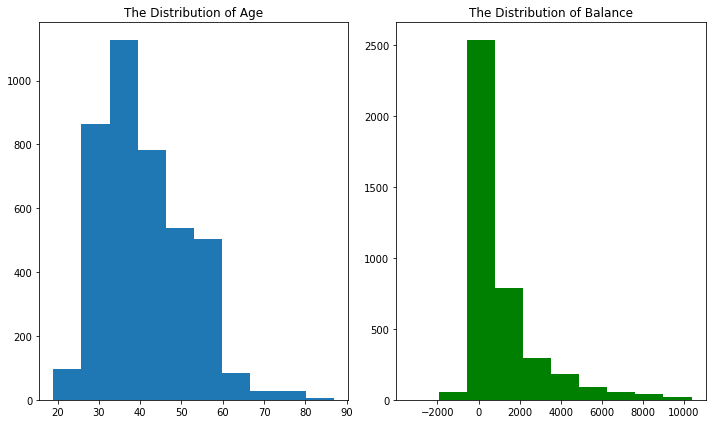

In [31]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(data7['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(data7['balance'], color = 'green')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

3.2 Visualize the relationship between 'age' and 'balance'

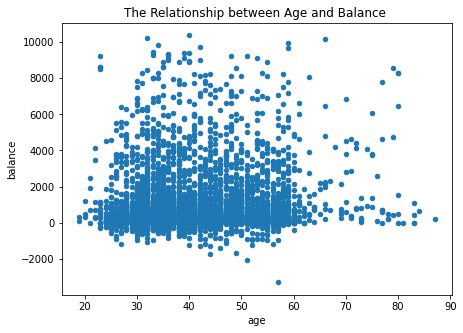

In [32]:
scatter_age_balance = data7.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

3.3 Visualize the distribution of 'duration' & 'campaign'

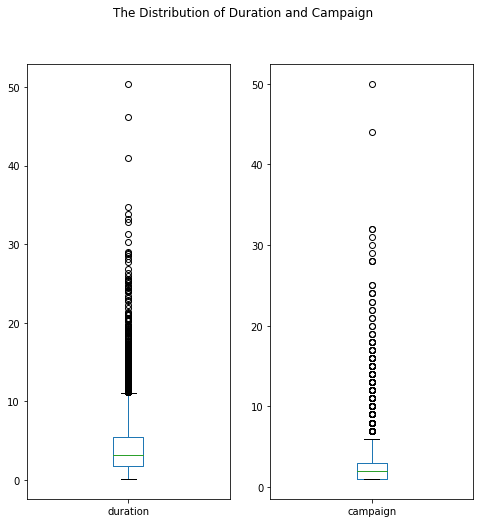

In [33]:
dist_dur_cam = data7[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

3.4 Visualize the relationship between 'duration' & 'campaign': with response result

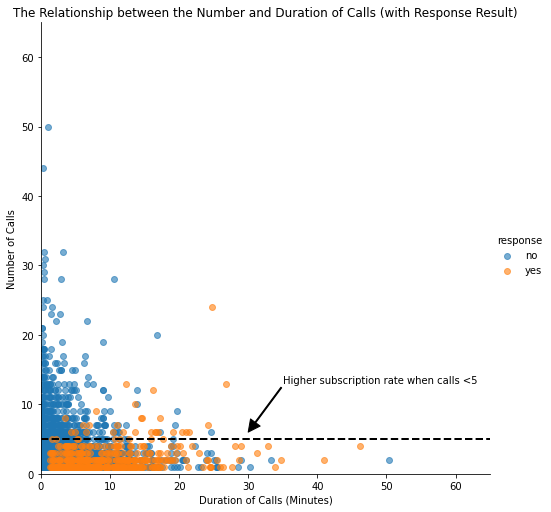

In [34]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = data7,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()


3.5 Scatter matrix and Correlation matrix

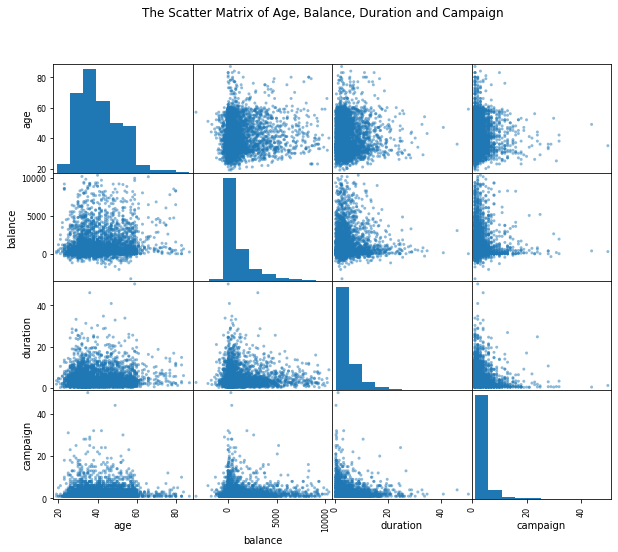

In [35]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(data7[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

In [36]:
data7

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,30,unemployed,married,primary,no,1787,no,no,19,oct,1.32,1,-1,0,unknown,no,0,10.0
1,33,services,married,secondary,no,4789,yes,yes,11,may,3.67,1,339,4,failure,no,0,5.0
2,35,management,single,tertiary,no,1350,yes,no,16,apr,3.08,1,330,1,failure,no,0,4.0
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,3.32,4,-1,0,unknown,no,0,6.0
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,3.77,1,-1,0,unknown,no,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,20,apr,0.75,4,153,1,failure,no,0,4.0
4515,32,services,single,secondary,no,473,yes,no,7,jul,10.40,5,-1,0,unknown,no,0,7.0
4516,33,services,married,secondary,no,-333,yes,no,30,jul,5.48,5,-1,0,unknown,no,0,7.0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,2.55,1,-1,0,unknown,no,0,5.0


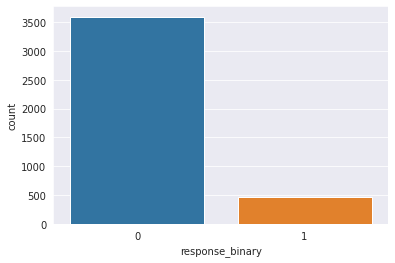

In [37]:
sns.set_style('darkgrid')
sns.countplot(x='response_binary',data=data7)


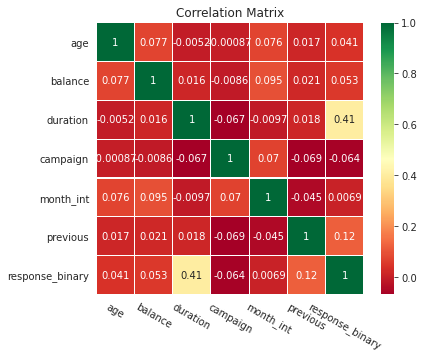

In [38]:
corr_data = data7[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr('pearson')

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [39]:
data7

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int
0,30,unemployed,married,primary,no,1787,no,no,19,oct,1.32,1,-1,0,unknown,no,0,10.0
1,33,services,married,secondary,no,4789,yes,yes,11,may,3.67,1,339,4,failure,no,0,5.0
2,35,management,single,tertiary,no,1350,yes,no,16,apr,3.08,1,330,1,failure,no,0,4.0
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,3.32,4,-1,0,unknown,no,0,6.0
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,3.77,1,-1,0,unknown,no,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,20,apr,0.75,4,153,1,failure,no,0,4.0
4515,32,services,single,secondary,no,473,yes,no,7,jul,10.40,5,-1,0,unknown,no,0,7.0
4516,33,services,married,secondary,no,-333,yes,no,30,jul,5.48,5,-1,0,unknown,no,0,7.0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,2.55,1,-1,0,unknown,no,0,5.0


#4.Data Visualization 


4.1 Visualize the subscription and contact rate by age

In [0]:
lst = [data7]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [41]:
data7

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int,age_group
0,30,unemployed,married,primary,no,1787,no,no,19,oct,1.32,1,-1,0,unknown,no,0,10.0,30.0
1,33,services,married,secondary,no,4789,yes,yes,11,may,3.67,1,339,4,failure,no,0,5.0,30.0
2,35,management,single,tertiary,no,1350,yes,no,16,apr,3.08,1,330,1,failure,no,0,4.0,30.0
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,3.32,4,-1,0,unknown,no,0,6.0,30.0
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,3.77,1,-1,0,unknown,no,0,5.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,20,apr,0.75,4,153,1,failure,no,0,4.0,30.0
4515,32,services,single,secondary,no,473,yes,no,7,jul,10.40,5,-1,0,unknown,no,0,7.0,30.0
4516,33,services,married,secondary,no,-333,yes,no,30,jul,5.48,5,-1,0,unknown,no,0,7.0,30.0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,2.55,1,-1,0,unknown,no,0,5.0,50.0


In [0]:
count_age_response_pct = pd.crosstab(data7['response'],data7['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [0]:
age = pd.DataFrame(data7['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

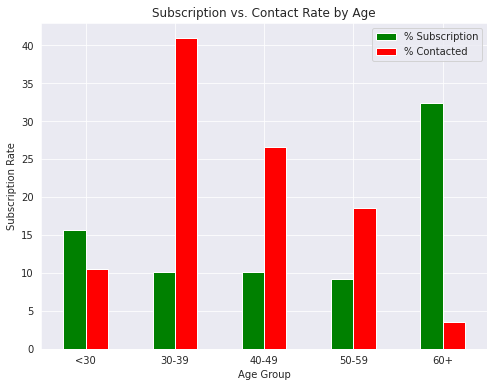

In [44]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

4.2 Visualize the subscription rate by balance level

In [0]:
lst = [data7]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [0]:
count_balance_response_pct = pd.crosstab(data7['response'],data7['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [0]:
bal = pd.DataFrame(data7['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

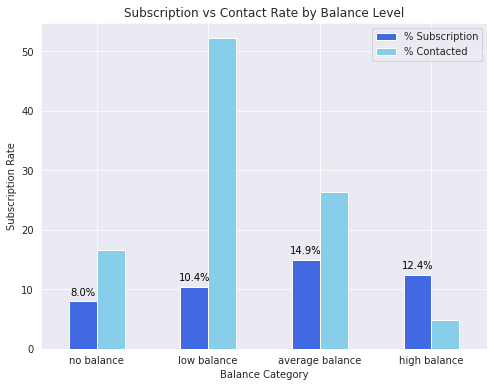

In [48]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

4.3 Visualize the subscription rate by age and balance

In [0]:
age_balance1 = pd.DataFrame(data7.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(data7.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

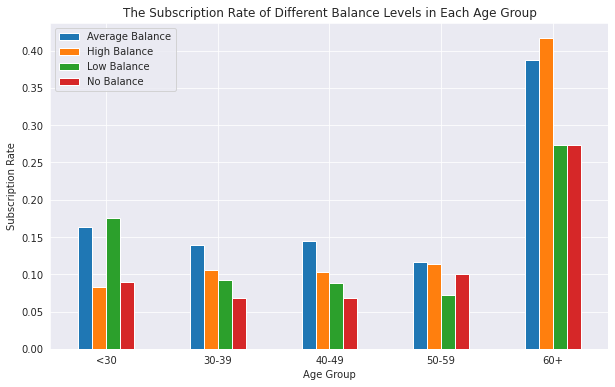

In [50]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

4.4 Visualize the subscription rate by job

In [0]:
count_job_response_pct = pd.crosstab(data7['response'],data7['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

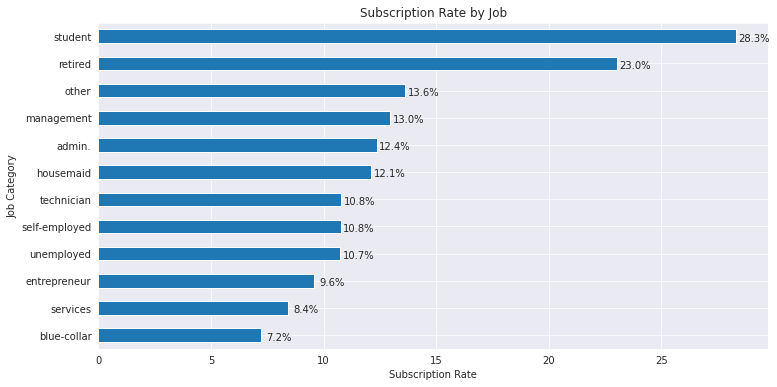

In [52]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

4.5 Visualize the subscription and contact rate by month

In [0]:
count_month_response_pct = pd.crosstab(data7['response'],data7['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [0]:
month = pd.DataFrame(data7['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

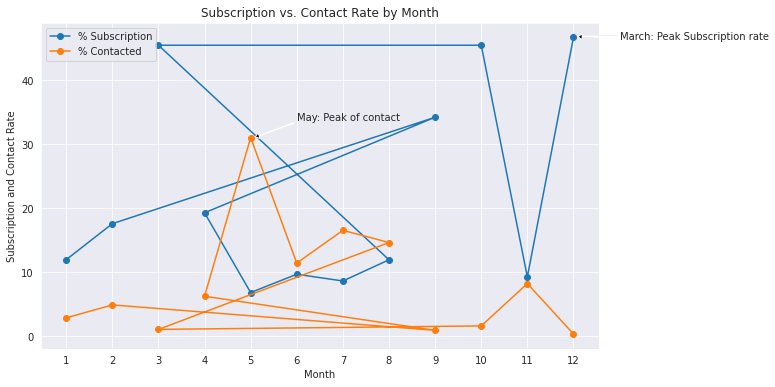

In [55]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()


In [56]:
dataset=data7
dataset

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int,age_group,balance_group
0,30,unemployed,married,primary,no,1787,no,no,19,oct,1.32,1,-1,0,unknown,no,0,10.0,30.0,average balance
1,33,services,married,secondary,no,4789,yes,yes,11,may,3.67,1,339,4,failure,no,0,5.0,30.0,average balance
2,35,management,single,tertiary,no,1350,yes,no,16,apr,3.08,1,330,1,failure,no,0,4.0,30.0,average balance
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,3.32,4,-1,0,unknown,no,0,6.0,30.0,average balance
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,3.77,1,-1,0,unknown,no,0,5.0,50.0,no balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,20,apr,0.75,4,153,1,failure,no,0,4.0,30.0,average balance
4515,32,services,single,secondary,no,473,yes,no,7,jul,10.40,5,-1,0,unknown,no,0,7.0,30.0,low balance
4516,33,services,married,secondary,no,-333,yes,no,30,jul,5.48,5,-1,0,unknown,no,0,7.0,30.0,no balance
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,2.55,1,-1,0,unknown,no,0,5.0,50.0,no balance


## Prepare Data for Classification

In [57]:
dataset

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary,month_int,age_group,balance_group
0,30,unemployed,married,primary,no,1787,no,no,19,oct,1.32,1,-1,0,unknown,no,0,10.0,30.0,average balance
1,33,services,married,secondary,no,4789,yes,yes,11,may,3.67,1,339,4,failure,no,0,5.0,30.0,average balance
2,35,management,single,tertiary,no,1350,yes,no,16,apr,3.08,1,330,1,failure,no,0,4.0,30.0,average balance
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,3.32,4,-1,0,unknown,no,0,6.0,30.0,average balance
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,3.77,1,-1,0,unknown,no,0,5.0,50.0,no balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,blue-collar,married,secondary,no,1205,yes,no,20,apr,0.75,4,153,1,failure,no,0,4.0,30.0,average balance
4515,32,services,single,secondary,no,473,yes,no,7,jul,10.40,5,-1,0,unknown,no,0,7.0,30.0,low balance
4516,33,services,married,secondary,no,-333,yes,no,30,jul,5.48,5,-1,0,unknown,no,0,7.0,30.0,no balance
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,2.55,1,-1,0,unknown,no,0,5.0,50.0,no balance


Dropping martial column from the dataset

In [0]:
dataset.drop(['marital'],axis=1, inplace=True)
dataset1 = dataset.iloc[:, 0:7]

Selecting first seven columns for dataset1

In [61]:
dataset1

,age,job,education,default,balance,housing,loan
0,30,unemployed,primary,no,1787,no,no
1,33,services,secondary,no,4789,yes,yes
2,35,management,tertiary,no,1350,yes,no
3,30,management,tertiary,no,1476,yes,yes
4,59,blue-collar,secondary,no,0,yes,no
...,...,...,...,...,...,...,...
4514,38,blue-collar,secondary,no,1205,yes,no
4515,32,services,secondary,no,473,yes,no
4516,33,services,secondary,no,-333,yes,no
4517,57,self-employed,tertiary,yes,-3313,yes,yes


Transforming categorical data into binary format

In [0]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(dataset['response_binary'])

In [63]:
dataset3=pd.concat([dataset2,dataset_response],axis=1)
dataset3

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,response_binary
0,30,0,1787,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,33,0,4789,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,35,0,1350,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,30,0,1476,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,59,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,38,0,1205,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4515,32,0,473,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4516,33,0,-333,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4517,57,1,-3313,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


Applying pearson correlation with the target variable(response_binary)

In [65]:
dataset3.corr('pearson')["response_binary"].sort_values()

housing               -0.108601
loan                  -0.073980
job_blue-collar       -0.066978
education_primary     -0.030078
job_services          -0.029445
education_secondary   -0.028285
job_entrepreneur      -0.010572
job_technician        -0.007620
default               -0.004889
job_self-employed     -0.003557
job_unemployed        -0.003201
job_housemaid          0.003990
job_other              0.005395
job_admin.             0.011206
job_management         0.026949
age                    0.040997
balance                0.053404
education_tertiary     0.054476
job_student            0.065801
job_retired            0.085120
response_binary        1.000000
Name: response_binary, dtype: float64

Selecting balance and age as our features for training the Model after analysis of domain knowledge

In [67]:
df=pd.DataFrame(dataset3)
features=df[['balance','age']]
features

,balance,age
0,1787,30
1,4789,33
2,1350,35
3,1476,30
4,0,59
...,...,...
4514,1205,38
4515,473,32
4516,-333,33
4517,-3313,57


Selecting response_binary as target variable

In [0]:
target=df['response_binary']

In [0]:
target.columns=['target']

In [70]:
target

0       0
1       0
2       0
3       0
4       0
       ..
4514    0
4515    0
4516    0
4517    0
4518    0
Name: response_binary, Length: 4054, dtype: int64

In [71]:
target.value_counts()


0    3595
1     459
Name: response_binary, dtype: int64

In [0]:
X=features
Y=target

Concating features and target into the dataframe

In [0]:
df1=pd.concat([X,Y],axis=1)

In [74]:
print(df1)

      balance  age  response_binary
0        1787   30                0
1        4789   33                0
2        1350   35                0
3        1476   30                0
4           0   59                0
...       ...  ...              ...
4514     1205   38                0
4515      473   32                0
4516     -333   33                0
4517    -3313   57                0
4518      295   57                0

[4054 rows x 3 columns]


Scaling the features using Min-Max Scaler

In [0]:
X = (X-X.min()) / (X.max()-X.min())

In [80]:
X

,balance,age
0,0.372507,0.161765
1,0.591776,0.205882
2,0.340589,0.235294
3,0.349792,0.161765
4,0.241984,0.588235
...,...,...
4514,0.329998,0.279412
4515,0.276532,0.191176
4516,0.217661,0.205882
4517,0.000000,0.558824



Splitting values into train and test dataset using train_test_split

In [0]:
xtrain, xtest, ytrain, ytest= train_test_split(X,Y, test_size=0.3)

In [82]:
ytest

2809    0
3321    1
2290    0
2679    0
745     0
       ..
2160    0
1194    0
992     0
1338    0
354     0
Name: response_binary, Length: 1217, dtype: int64

In [83]:
xtest

,balance,age
2809,0.247462,0.558824
3321,0.372873,0.235294
2290,0.258637,0.279412
2679,0.293039,0.161765
745,0.246804,0.500000
...,...,...
2160,0.489373,0.602941
1194,0.375283,0.250000
992,0.306187,0.294118
1338,0.177124,0.485294


In [84]:
xtrain

,balance,age
4310,0.377255,0.250000
527,0.246804,0.441176
2204,0.245417,0.441176
3320,0.263166,0.426471
3404,0.275071,0.088235
...,...,...
4437,0.567745,0.367647
2071,0.589657,0.264706
204,0.275217,0.147059
2031,0.242276,0.205882


In [85]:
ytrain

4310    0
527     0
2204    0
3320    0
3404    0
       ..
4437    0
2071    0
204     1
2031    0
121     0
Name: response_binary, Length: 2837, dtype: int64

In [90]:
ytraincount=pd.value_counts(ytrain)
ytraincount

0    2523
1     314
Name: response_binary, dtype: int64

Ytest is biased towards 0

In [89]:
var = pd.value_counts(ytest)
var

0    1072
1     145
Name: response_binary, dtype: int64

In [88]:
a = var[0]
b = var[1]
print("a":a)
print("b":b)
if(a>b):
  k=b
else:
  k=a

print("k":k)

145


In [0]:
index=0
onecount=0
zerocount=0
ytestt=[]
for i in range(len(ytest)):
  if(ytest[i]==0 and zerocount<k):
    ytestt.append(ytest[i])
    zerocount+=1
  elif(ytest[i]==1 and onecount<k):
    ytestt.append(ytest[i])
    onecount+=1
  elif(onecount==k and zerocount==k):
    break

print(ytestt)
print(len(ytestt))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
260


In [0]:
type(ytest)

pandas.core.series.Series

In [0]:
type(ytestt)

list

In [0]:
ytestt=pd.Series(ytestt)
type(ytestt)

pandas.core.series.Series

In [0]:
ytestt

0      0
1      0
2      0
3      0
4      0
      ..
255    1
256    1
257    1
258    1
259    1
Length: 260, dtype: int64

In [0]:
type(ytest)

pandas.core.series.Series

In [0]:
type(xtest)

pandas.core.frame.DataFrame

In [0]:
xtestt=xtest.sample(2*k)
xtestt

,balance,age
1901,0.244467,0.161765
456,0.640932,0.220588
2914,0.289825,0.264706
2278,0.310861,0.220588
1924,0.217953,0.367647
...,...,...
1396,0.292163,0.191176
2353,0.315536,0.220588
1215,0.285662,0.058824
4217,0.447374,0.279412


In [0]:
ytestt

0      0
1      0
2      0
3      0
4      0
      ..
255    1
256    1
257    1
258    1
259    1
Length: 260, dtype: int64

In [0]:
# xtrainn=xtrain.sample(int((14*k)/3))
# xtrainn


In [0]:
# ytrainn=ytrain.sample(int((14*k)/3))
#  ytrainn

In [0]:
pd.value_counts(ytrain)

0    2508
1     329
Name: response_binary, dtype: int64

In [0]:
var2 = pd.value_counts(ytrain)

In [0]:
l = var2[0]
m = var2[1]
print(l)
print(m)

2508
329


In [0]:
if(l>m):
  k1=m
else:
  k1=l

print(k1)

329


In [0]:
index=0
onecount=0
zerocount=0
ytrainn=[]
for i in range(len(ytrain)):
  if(ytrain[i]==0 and zerocount<k1):
    ytrainn.append(ytrain[i])
    zerocount+=1
  elif(ytrain[i]==1 and onecount<k1):
    ytrainn.append(ytrain[i])
    onecount+=1
  elif(onecount==k1 and zerocount==k1):
    break

print(ytrainn)
print(len(ytrainn))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
type(ytrain)

pandas.core.series.Series

In [0]:
type(ytrainn)

list

In [0]:
ytrainn=pd.Series(ytrainn)
type(ytrainn)

pandas.core.series.Series

In [0]:
ytrainn

0      0
1      0
2      0
3      0
4      0
      ..
653    1
654    1
655    1
656    1
657    1
Length: 658, dtype: int64

In [0]:
pd.value_counts(ytrainn)

1    329
0    329
dtype: int64

In [0]:
xtrainn=xtrain.head(2*k1)
xtrainn

,balance,age
4375,0.248704,0.147059
876,0.285443,0.205882
2336,0.437879,0.235294
2452,0.271273,0.338235
1286,0.330947,0.191176
...,...,...
572,0.338324,0.500000
1946,0.260755,0.338235
151,0.274268,0.250000
1862,0.331824,0.411765


In [0]:
x1='balance'
x2='age'
basex = np.array(xtrainn[[x1, x2]])

basey = np.array(ytrainn)

xtest = np.array(xtestt[[x1, x2]])
ytest = np.array(ytestt)


#KNN Algorithm



Calculate Distance between any two given points
the Euclidean distance or Euclidean metric is the "ordinary" straight-line distance between two points in Euclidean space.

In [0]:
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)


 This function calculates distance with respect to all the points.
 This is the drawback of KNN as calculating distance w.r.t all points is not feasable in huge data.
 Hence KNN is usually used for small datasets

In [0]:
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda mytup: mytup[0])
    return all_distances


Depending on the distances it takes the neighbours

In [0]:
def get_neighbours(distances, count):
    return distances[:count]

Takes a given point and predicts the class based on all other points

In [0]:
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 3)
    op = [row[-1] for row in neighbours]
    prediction = max(op, key=op.count)
    return prediction



# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

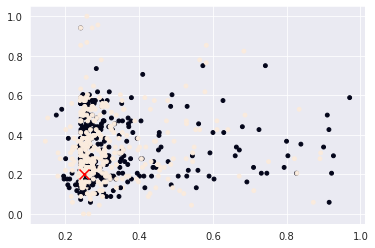

In [0]:
plt.scatter(basex[:,0].reshape(-1,1), basex[:,1].reshape(-1,1), c=basey, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

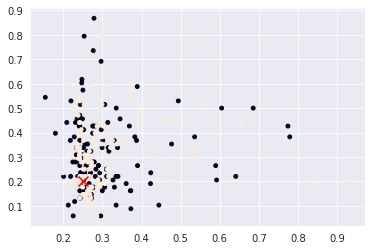

In [0]:
plt.scatter(xtest[:,0].reshape(-1,1), xtest[:,1].reshape(-1,1), c=ytest, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [0]:
accuracy(basex,basey,xtest,ytest)

'Accuracy: 52.69230769230769%'